In [205]:
using StatsBase
using LightGraphs
using GraphPlot
using MetaGraphs
adapters = sort(parse.(Int, readlines("input/day10.txt")));
device_builtin_joltage = maximum(adapters) + 3;
adapters = vcat([0], adapters, [device_builtin_joltage]);

In [206]:
function get_next_adapter(adapter_value, adapters)
    if adapter_value + 1 in adapters
        return adapter_value + 1
    end
    if adapter_value + 3 in adapters
        return adapter_value + 3
    end
    nothing
end

function get_next_adapters(adapter_value, adapters)
    next_adapters = []
    nexts = [1, 2, 3]
    for n in nexts
        if adapter_value + n in adapters
            push!(next_adapters, adapter_value + n)
        end
    end
    next_adapters
end


get_next_adapters (generic function with 1 method)

In [207]:
adapter_chains = map(adapters) do a
    next_adapters = get_next_adapters(a, adapters)
    if !(next_adapters == [])
        return [a, next_adapters]
    end
end
pop!(adapter_chains)
# adapter_chain = vcat([0], adapter_chain[1:end-1])
# differences = countmap(adapter_chain[2:end] .- adapter_chain[1:end-1])
# result = differences[1] * differences[3]

In [208]:
adapter_chains

104-element Array{Union{Nothing, Array{Any,1}},1}:
 Any[0, Any[1, 2, 3]]
 Any[1, Any[2, 3, 4]]
 Any[2, Any[3, 4]]
 Any[3, Any[4]]
 Any[4, Any[7]]
 Any[7, Any[8, 9, 10]]
 Any[8, Any[9, 10, 11]]
 Any[9, Any[10, 11]]
 Any[10, Any[11]]
 Any[11, Any[14]]
 Any[14, Any[15, 16, 17]]
 Any[15, Any[16, 17]]
 Any[16, Any[17]]
 ⋮
 Any[144, Any[147]]
 Any[147, Any[148, 149]]
 Any[148, Any[149]]
 Any[149, Any[152]]
 Any[152, Any[155]]
 Any[155, Any[156]]
 Any[156, Any[159]]
 Any[159, Any[160, 161, 162]]
 Any[160, Any[161, 162, 163]]
 Any[161, Any[162, 163]]
 Any[162, Any[163]]
 Any[163, Any[166]]

In [209]:
adapter_edges = map(adapter_chains) do x
    r = []
    for i in x[2]
        push!(r, (x[1], i))
    end
    r
end |> Iterators.flatten |> collect;

In [210]:
adapter_vertices = vcat(first.(adapter_edges), last.(adapter_edges)) |> unique;

In [211]:
g = DiGraph(maximum(adapter_vertices))

{166, 0} directed simple Int64 graph

In [212]:
for (src_edge, dst_edge) in adapter_edges
    add_edge!(g, src_edge, dst_edge)
end

In [213]:
nodelabels = 1:maximum(adapter_vertices)

1:166

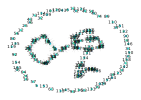

In [214]:
gplot(g; nodelabel=nodelabels)

In [215]:
;rm myfile.txt

In [216]:
function print_all_paths_until(g, u, d, visited, path)
    visited[u] = true
    push!(path, u)
    if u == d
        f = open("myfile.txt", "a")
        writestr = join(path, ",")
        write(f, writestr * "\n")
        close(f)
    else
        for n in outneighbors(g, u)
#            visited[n] && continue
            print_all_paths_until(g, n, d, visited, path)
        end
    end
    pop!(path)
    visited[u] = false
end

function print_all_paths(g, s, d)
    visited = falses(nv(g))
    path = []
    print_all_paths_until(g, s, d, visited, path)
end
print_all_paths(g, 1, device_builtin_joltage)

LoadError: InterruptException:

In [217]:
paths = [parse.(Int, split(l, ",")) for l in readlines("myfile.txt")];

In [218]:
last.(paths) |> unique

1-element Array{Int64,1}:
 166

In [184]:
length(paths)

10976

In [219]:
const trailing_x = Dict{Array{Int}, Int}()
function count_paths_memoize(x)
    length(x) == 1 && return 1
    n = 0
    for j = x[1] .+ (1:3)
        if j ∈ x
            trailing_xi = x[findfirst(==(j), x):end]
            n += get!(trailing_x, trailing_xi) do
                count_paths_memoize(trailing_xi)
            end
        end
    end
    return n
end

println(@time count_paths_memoize(adapters))

  0.044109 seconds (75.76 k allocations: 4.018 MiB)
396857386627072


In [189]:
length(adapters)

33

In [204]:
?get!

search: get! mergewith! merge_vertices! get getpid getkey getfield getindex



```
get!(collection, key, default)
```

Return the value stored for the given key, or if no mapping for the key is present, store `key => default`, and return `default`.

# Examples

```jldoctest
julia> d = Dict("a"=>1, "b"=>2, "c"=>3);

julia> get!(d, "a", 5)
1

julia> get!(d, "d", 4)
4

julia> d
Dict{String,Int64} with 4 entries:
  "c" => 3
  "b" => 2
  "a" => 1
  "d" => 4
```

---

```
get!(f::Function, collection, key)
```

Return the value stored for the given key, or if no mapping for the key is present, store `key => f()`, and return `f()`.

This is intended to be called using `do` block syntax:

```julia
get!(dict, key) do
    # default value calculated here
    time()
end
```

---

```
get!(sd,k,v)
```

Returns the value associated with key `k` where `sd` is a SortedDict, or else returns `v` if `k` is not in `sd`, and in the latter case, inserts `(k,v)` into `sd`. Time: O(*c* log *n*)

---

```
get!(collection, key, default)
```

Return the value stored for the given key, or if no mapping for the key is present, store `key => default`, and return `default`.

# Examples

```jldoctest
julia> d = RobinDict("a"=>1, "b"=>2, "c"=>3);

julia> get!(d, "a", 5)
1

julia> get!(d, "d", 4)
4

julia> d
RobinDict{String,Int64} with 4 entries:
  "c" => 3
  "b" => 2
  "a" => 1
  "d" => 4
```

---

```
get!(f::Function, collection, key)
```

Return the value stored for the given key, or if no mapping for the key is present, store `key => f()`, and return `f()`.

This is intended to be called using `do` block syntax:

```julia
get!(dict, key) do
    # default value calculated here
    time()
end
```

---

```
get!(collection, key, default)
```

Return the value stored for the given key, or if no mapping for the key is present, store `key => default`, and return `default`.

# Examples

```jldoctest
julia> d = OrderedRobinDict("a"=>1, "b"=>2, "c"=>3);

julia> get!(d, "a", 5)
1

julia> get!(d, "d", 4)
4

julia> d
OrderedRobinDict{String,Int64} with 4 entries:
  "a" => 1
  "b" => 2
  "c" => 3
  "d" => 4
```

---

```
get!(f::Function, collection, key)
```

Return the value stored for the given key, or if no mapping for the key is present, store `key => f()`, and return `f()`.

This is intended to be called using `do` block syntax:

```julia
get!(dict, key) do
    # default value calculated here
    time()
end
```

---

```
get!(collection, key, default)
```

Return the value stored for the given key, or if no mapping for the key is present, store `key => default`, and return `default`.

# Examples

```jldoctest
julia> d = SwissDict("a"=>1, "b"=>2, "c"=>3);

julia> get!(d, "a", 5)
1

julia> get!(d, "d", 4)
4

julia> d
SwissDict{String,Int64} with 4 entries:
  "c" => 3
  "b" => 2
  "a" => 1
  "d" => 4
```

---

```
get!(f::Function, collection, key)
```

Return the value stored for the given key, or if no mapping for the key is present, store `key => f()`, and return `f()`.

This is intended to be called using `do` block syntax:

```julia
get!(dict, key) do
    # default value calculated here
    time()
end
```


In [202]:
?findfirst

search: findfirst



```
findfirst(A)
```

Return the index or key of the first `true` value in `A`. Return `nothing` if no such value is found. To search for other kinds of values, pass a predicate as the first argument.

Indices or keys are of the same type as those returned by [`keys(A)`](@ref) and [`pairs(A)`](@ref).

# Examples

```jldoctest
julia> A = [false, false, true, false]
4-element Array{Bool,1}:
 0
 0
 1
 0

julia> findfirst(A)
3

julia> findfirst(falses(3)) # returns nothing, but not printed in the REPL

julia> A = [false false; true false]
2×2 Array{Bool,2}:
 0  0
 1  0

julia> findfirst(A)
CartesianIndex(2, 1)
```

---

```
findfirst(predicate::Function, A)
```

Return the index or key of the first element of `A` for which `predicate` returns `true`. Return `nothing` if there is no such element.

Indices or keys are of the same type as those returned by [`keys(A)`](@ref) and [`pairs(A)`](@ref).

# Examples

```jldoctest
julia> A = [1, 4, 2, 2]
4-element Array{Int64,1}:
 1
 4
 2
 2

julia> findfirst(iseven, A)
2

julia> findfirst(x -> x>10, A) # returns nothing, but not printed in the REPL

julia> findfirst(isequal(4), A)
2

julia> A = [1 4; 2 2]
2×2 Array{Int64,2}:
 1  4
 2  2

julia> findfirst(iseven, A)
CartesianIndex(2, 1)
```

---

```
findfirst(pattern::AbstractString, string::AbstractString)
findfirst(pattern::Regex, string::String)
```

Find the first occurrence of `pattern` in `string`. Equivalent to [`findnext(pattern, string, firstindex(s))`](@ref).

# Examples

```jldoctest
julia> findfirst("z", "Hello to the world") # returns nothing, but not printed in the REPL

julia> findfirst("Julia", "JuliaLang")
1:5
```

---

```
findfirst(ch::AbstractChar, string::AbstractString)
```

Find the first occurrence of character `ch` in `string`.

!!! compat "Julia 1.3"
    This method requires at least Julia 1.3.


# Examples

```jldoctest
julia> findfirst('a', "happy")
2

julia> findfirst('z', "happy") === nothing
true
```
